In [96]:
import pandas as pd
import seaborn as sns 
import numpy as np
import scipy.stats as stats
sns.set_style('white')
sns.set_context('paper')
sns.set_palette("colorblind")

In [2]:
df_recife = pd.read_csv("data/weather-recife.csv", header = 0)
df_petrolina =  pd.read_csv("data/weather-petrolina.csv", header = 0)
df_floresta = pd.read_csv("data/weather-floresta.csv", header = 0)

In [3]:
for i in [df_recife,df_petrolina,df_floresta]:
    i["data"] = pd.to_datetime(i["data"], dayfirst = True)

In [4]:
df_recife = df_recife.drop(["codigo_estacao"], axis = 1).set_index("data").sort_index()
df_petrolina = df_petrolina.drop(["codigo_estacao"], axis = 1).set_index("data").sort_index()
df_floresta = df_floresta.drop(["codigo_estacao"], axis = 1).set_index("data").sort_index()

In [5]:
df_recife = df_recife.replace(value = np.nan, to_replace =  '////').astype("float64")
df_petrolina= df_petrolina.replace(value = np.nan, to_replace =  '////').astype("float64")


In [6]:
dfr = df_recife[["temp_max",
                 "temp_min","umid_max", "umid_min"]].groupby(df_recife.index).mean();

In [13]:
dfp = df_petrolina[["temp_max", 
              "temp_min","umid_max", "umid_min"]].groupby(df_petrolina.index).mean()

In [27]:
dfr["tempmean"] = (dfr["temp_max"] + dfr["temp_min"])/2
dfr["umidmean"] = (dfr["umid_max"] + dfr["umid_min"])/2
dfr = dfr.drop(["temp_max", "temp_min", "umid_max", "umid_min"], axis = 1 )

dfp["tempmean"] = (dfp["temp_max"] + dfp["temp_min"])/2
dfp["umidmean"] = (dfp["umid_max"] + dfp["umid_min"])/2
dfp = dfp.drop(["temp_max", "temp_min", "umid_max", "umid_min"], axis = 1 );


In [28]:
df2 = pd.merge(dfr.reset_index(), dfp.reset_index(),on="data",how='inner')

In [35]:
df2.set_index("data");

<IPython.core.display.Javascript object>


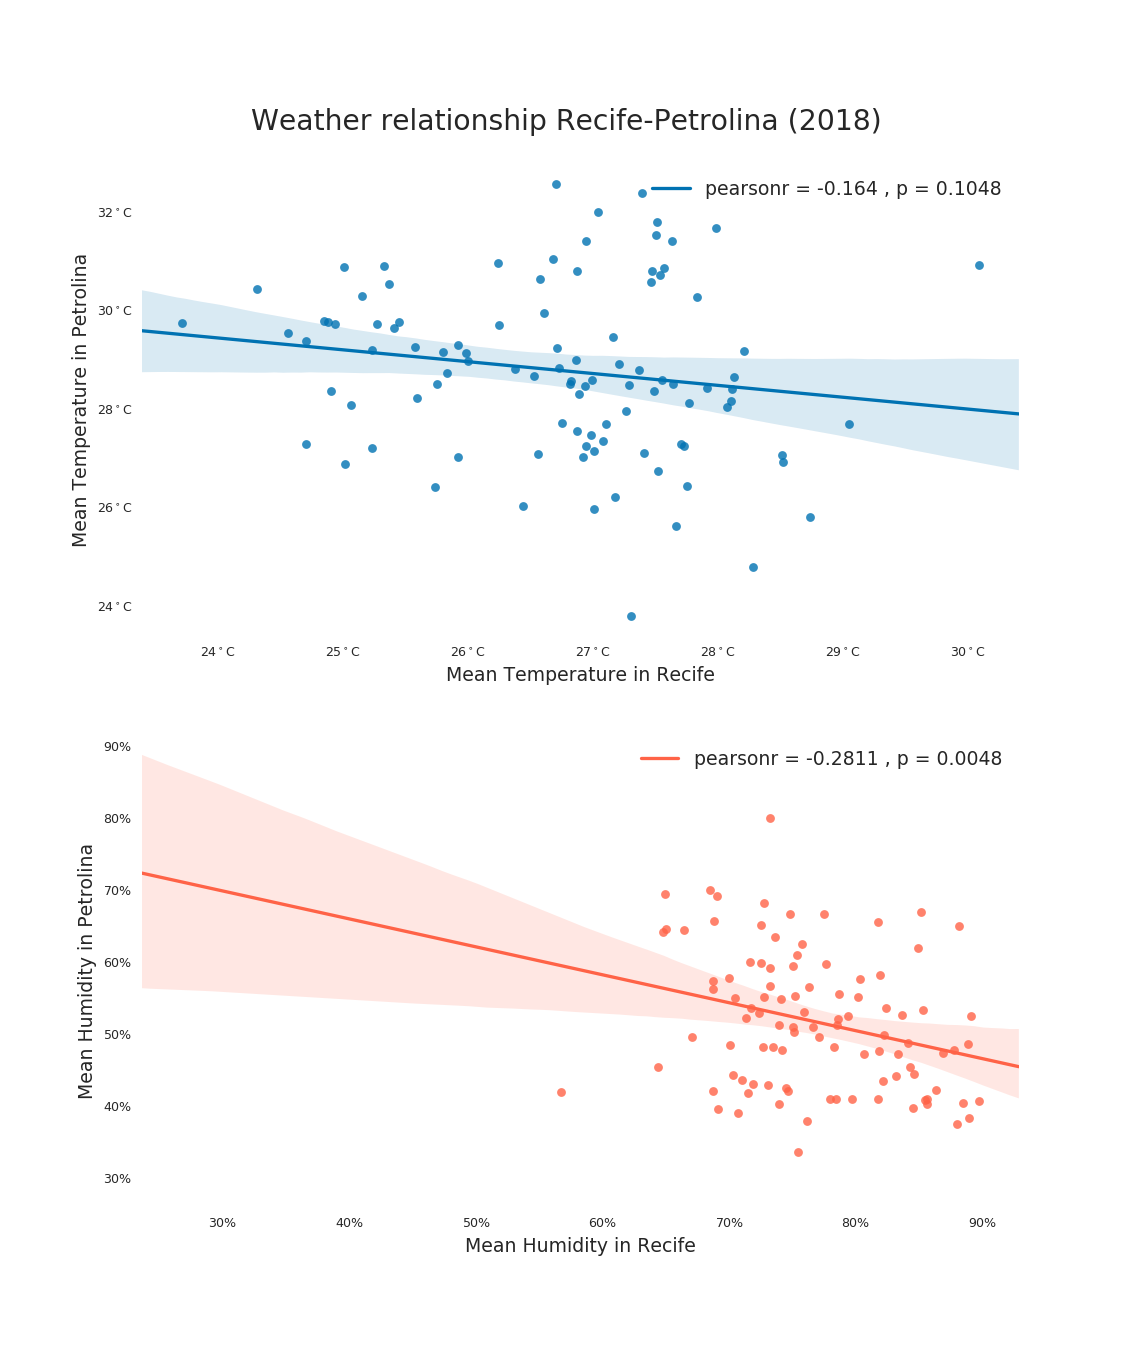

In [154]:
%matplotlib notebook
pearson1 = stats.pearsonr(df2["tempmean_x"], df2["tempmean_y"])
pearson2 = stats.pearsonr(df2["umidmean_x"], df2["umidmean_y"])


f, (ax1, ax2) = plt.subplots(2, figsize = (10,12))

sns.regplot(x="tempmean_x", y="tempmean_y", data=df2,ax = ax1)
ax1.legend(["pearsonr = {} , p = {}".format(round(pearson1[0],4), round(pearson1[1],4))],
           prop={'size': 12})
ax1.set(xlabel = "Mean Temperature in Recife",
       ylabel = "Mean Temperature in Petrolina")
ax1.yaxis.label.set_size(12)
ax1.xaxis.label.set_size(12)


sns.despine(left=True, bottom=True, right=True)
sns.regplot(x="umidmean_x", y="umidmean_y", data=df2, color = "tomato", ax=ax2)
ax2.legend(["pearsonr = {} , p = {}".format(round(pearson2[0],4), round(pearson2[1],4))],
          prop={'size': 12})
ax2.set(xlabel = "Mean Humidity in Recife",
       ylabel = "Mean Humidity in Petrolina");
ax2.yaxis.label.set_size(12)
ax2.xaxis.label.set_size(12)

sns.despine(left=True, bottom=True, right=True)

plt.suptitle("Weather relationship Recife-Petrolina (2018)",
             size = 18,
                y=0.92);

In [155]:
ax1.set_yticklabels(list(map(lambda x: "${}^\circ$C".format(x.get_text()),
                             list(ax1.get_yticklabels()))))
ax1.set_xticklabels(list(map(lambda x: "${}^\circ$C".format(x.get_text()),
                             list(ax1.get_xticklabels()))))

ax2.set_yticklabels(list(map(lambda x: "${}\%$".format(x.get_text()),
                             list(ax2.get_yticklabels()))))
ax2.set_xticklabels(list(map(lambda x: "${}\%$".format(x.get_text()),
                             list(ax2.get_xticklabels()))))



[Text(20,0,'$20\\%$'),
 Text(30,0,'$30\\%$'),
 Text(40,0,'$40\\%$'),
 Text(50,0,'$50\\%$'),
 Text(60,0,'$60\\%$'),
 Text(70,0,'$70\\%$'),
 Text(80,0,'$80\\%$'),
 Text(90,0,'$90\\%$'),
 Text(100,0,'$100\\%$')]

In [157]:
plt.savefig("ims/assignment4.png", dpi = 200)